### Running API for getting data set

In [1]:
# making parameters
# Currency and Time Frame
params = {
    "count": 3000,
    "granularity": 'H1'
}

In [2]:
# Calling the API
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import oandapyV20
import oandapyV20.endpoints.instruments as instruments
client = oandapyV20.API(access_token="3e0f7f10c6e7badcfabbf14ec0ea6e0f-f46e39153b94a3659e539e630ae9112a")

r = instruments.InstrumentsCandles(instrument="EUR_USD", params=params)
db = client.request(r)
print(r.response)


{'instrument': 'EUR_USD', 'granularity': 'H1', 'candles': [{'complete': True, 'volume': 406, 'time': '2019-12-27T19:00:00.000000000Z', 'mid': {'o': '1.11837', 'h': '1.11883', 'l': '1.11792', 'c': '1.11872'}}, {'complete': True, 'volume': 332, 'time': '2019-12-27T20:00:00.000000000Z', 'mid': {'o': '1.11874', 'h': '1.11874', 'l': '1.11753', 'c': '1.11762'}}, {'complete': True, 'volume': 249, 'time': '2019-12-27T21:00:00.000000000Z', 'mid': {'o': '1.11760', 'h': '1.11780', 'l': '1.11710', 'c': '1.11758'}}, {'complete': True, 'volume': 308, 'time': '2019-12-29T22:00:00.000000000Z', 'mid': {'o': '1.11773', 'h': '1.11805', 'l': '1.11718', 'c': '1.11799'}}, {'complete': True, 'volume': 306, 'time': '2019-12-29T23:00:00.000000000Z', 'mid': {'o': '1.11806', 'h': '1.11838', 'l': '1.11776', 'c': '1.11813'}}, {'complete': True, 'volume': 244, 'time': '2019-12-30T00:00:00.000000000Z', 'mid': {'o': '1.11811', 'h': '1.11880', 'l': '1.11806', 'c': '1.11878'}}, {'complete': True, 'volume': 202, 'time':

In [3]:
datetime.now()

datetime.datetime(2020, 6, 22, 21, 59, 47, 928636)

In [4]:
def first_step(win): 
    data_mid = pd.DataFrame(columns=('Time','Open','High','Low','Close','Vol'))

    item={}

    for i in range(len(db['candles'])):
        item={}
        item['Time']=db['candles'][i]['time']
        item['Open']=db['candles'][i]['mid']['o']
        item['High']=db['candles'][i]['mid']['h']
        item['Low']=db['candles'][i]['mid']['l']
        item['Close']=db['candles'][i]['mid']['c']
        item['Vol']=db['candles'][i]['volume']
        data_mid.loc[len(data_mid)]=item
  
    data_mid['Date'] = pd.to_datetime(data_mid.Time)
    global end
    global start
    end = data_mid.iloc[-1,-1]
    start = data_mid.iloc[(int(win)*-1),-1]
    
    global data
    data = data_mid.copy()
    data.set_index('Date', inplace=True)
    data['Open']=data.Open.astype(float)
    data['High']=data.High.astype(float)
    data['Low']=data.Low.astype(float)
    data['Close']=(data.High+data.Low)/2
    data['Vol']=data.Vol.astype(float)
    data['Dev']=data.High-data.Low
    data['M5']=data.Close.rolling(5).mean()
    data['M20']=data.Close.rolling(20).mean()
    data['M60']=data.Close.rolling(60).mean()
   

#### Making function
H_Periods: number of hours for making hurdle   
H_Bars : number of hurdles. Default = 10

In [5]:
def test(i):
    df=data.copy()
    H_Period = i
    H_Bars = 10
    df['Highest'] = df.High.rolling(H_Period).max()
    df['Lowest'] = df.Low.rolling(H_Period).min()
    df['Total_Vol'] = df.Vol.rolling(H_Period).sum()
    df['Price_Level'] = (df.Highest-df.Lowest)/H_Bars
    
    df['One_L']=df.Lowest
    df['One_H']=df.One_L+df.Price_Level
    df['One_V']=0
    df['One_R']=0
    df['One_T']=0
    df['Two_L']=df.One_H+0.0000001
    df['Two_H']=df.Two_L+df.Price_Level
    df['Two_V']=0
    df['Two_R']=0
    df['Two_T']=0
    df['Three_L']=df.Two_H+0.0000001
    df['Three_H']=df.Three_L+df.Price_Level
    df['Three_V']=0
    df['Three_R']=0
    df['Three_T']=0
    df['Four_L']=df.Three_H+0.0000001
    df['Four_H']=df.Four_L+df.Price_Level
    df['Four_V']=0
    df['Four_R']=0
    df['Four_T']=0
    df['Five_L']=df.Four_H+0.0000001
    df['Five_H']=df.Five_L+df.Price_Level
    df['Five_V']=0
    df['Five_R']=0
    df['Five_T']=0
    df['Six_L']=df.Five_H+0.0000001
    df['Six_H']=df.Six_L+df.Price_Level
    df['Six_V']=0
    df['Six_R']=0
    df['Six_T']=0
    df['Seven_L']=df.Six_H+0.0000001
    df['Seven_H']=df.Seven_L+df.Price_Level
    df['Seven_V']=0
    df['Seven_R']=0
    df['Seven_T']=0
    df['Eight_L']=df.Seven_H+0.0000001
    df['Eight_H']=df.Eight_L+df.Price_Level
    df['Eight_V']=0
    df['Eight_R']=0
    df['Eight_T']=0
    df['Nine_L']=df.Eight_H+0.0000001
    df['Nine_H']=df.Nine_L+df.Price_Level
    df['Nine_V']=0
    df['Nine_R']=0
    df['Nine_T']=0
    df['Ten_L']=df.Nine_H+0.0000001
    df['Ten_H']=df.Ten_L+df.Price_Level
    df['Ten_V']=0
    df['Ten_R']=0
    df['Ten_T']=0
    
    df.One_V.loc[(df.Close > df.One_L)&(df.Close <= df.One_H)] = df.Vol
    df.Two_V.loc[(df.Close > df.Two_L)&(df.Close <= df.Two_H)] = df.Vol
    df.Three_V.loc[(df.Close > df.Three_L)&(df.Close <=df.Three_H)] = df.Vol
    df.Four_V.loc[(df.Close > df.Four_L)&(df.Close <= df.Four_H)] = df.Vol
    df.Five_V.loc[(df.Close > df.Five_L)&(df.Close <= df.Five_H)] = df.Vol
    df.Six_V.loc[(df.Close > df.Six_L)&(df.Close <= df.Six_H)] = df.Vol
    df.Seven_V.loc[(df.Close > df.Seven_L)&(df.Close <= df.Seven_H)] = df.Vol
    df.Eight_V.loc[(df.Close > df.Eight_L)&(df.Close <= df.Eight_H)] = df.Vol
    df.Nine_V.loc[(df.Close > df.Nine_L)&(df.Close <= df.Nine_H)] = df.Vol
    df.Ten_V.loc[(df.Close > df.Ten_L)&(df.Close <= df.Ten_H)] = df.Vol    
    
    df.One_T= df.One_V.rolling(H_Period).sum()
    df.Two_T= df.Two_V.rolling(H_Period).sum()
    df.Three_T= df.Three_V.rolling(H_Period).sum()
    df.Four_T= df.Four_V.rolling(H_Period).sum()
    df.Five_T= df.Five_V.rolling(H_Period).sum()
    df.Six_T= df.Six_V.rolling(H_Period).sum()
    df.Seven_T= df.Seven_V.rolling(H_Period).sum()
    df.Eight_T= df.Eight_V.rolling(H_Period).sum()
    df.Nine_T= df.Nine_V.rolling(H_Period).sum()
    df.Ten_T= df.Ten_V.rolling(H_Period).sum()
    df.One_R= (df.One_T/df.Total_Vol)*100
    df.Two_R= (df.Two_T/df.Total_Vol)*100
    df.Three_R= (df.Three_T/df.Total_Vol)*100
    df.Four_R= (df.Four_T/df.Total_Vol)*100
    df.Five_R= (df.Five_T/df.Total_Vol)*100
    df.Six_R= (df.Six_T/df.Total_Vol)*100
    df.Seven_R= (df.Seven_T/df.Total_Vol)*100
    df.Eight_R= (df.Eight_T/df.Total_Vol)*100
    df.Nine_R= (df.Nine_T/df.Total_Vol)*100
    df.Ten_R= (df.Ten_T/df.Total_Vol)*100
    
    test = df.copy()
    test = test.fillna(0)
    print(test.tail())
    
    time4excel = datetime.now()
    time4excel = time4excel.strftime("%Y_%m_%d_%H_%M_%S")
    
#    test.to_csv(time4excel+'EURUSD1H_1.csv')
    
    s = test.filter(like='_R').idxmax(1).str.replace('_R','_L')
    test['Show_L'] = test.lookup(s.index,s)
    s = test.filter(like='_R').idxmax(1).str.replace('_R','_H')
    test['Show_H'] = test.lookup(s.index,s)
    
    recent_5 = test.iloc[-5,0]
    print(test.loc[recent_5:,['Close','M5','Show_L','Show_H','Vol']])
   

  
    
    plt.figure(figsize=(25,10))
    top = plt.subplot2grid((4,4),(0,0), rowspan=3, colspan=4)
    bottom = plt.subplot2grid((4,4),(3,0),rowspan=1, colspan=4)
    drawing = test.loc[start:end,['Close','Show_L','Show_H','Vol','M5','M60']]
    top.plot(drawing.index, drawing[['Close','Show_L','Show_H','M5','M60']])
    bottom.bar(drawing.index, drawing['Vol'])
    return
    

In [6]:
def running(period, win):
    first_step(win)
    test(period)
    

C:\Users\bearp\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                                                     Time     Open     High  \
Date                                                                          
2020-06-22 15:00:00+00:00  2020-06-22T15:00:00.000000000Z  1.12486  1.12617   
2020-06-22 16:00:00+00:00  2020-06-22T16:00:00.000000000Z  1.12600  1.12640   
2020-06-22 17:00:00+00:00  2020-06-22T17:00:00.000000000Z  1.12610  1.12637   
2020-06-22 18:00:00+00:00  2020-06-22T18:00:00.000000000Z  1.12586  1.12634   
2020-06-22 19:00:00+00:00  2020-06-22T19:00:00.000000000Z  1.12609  1.12626   

                               Low     Close     Vol      Dev        M5  \
Date                                                                      
2020-06-22 15:00:00+00:00  1.12466  1.125415  5687.0  0.00151  1.123384   
2020-06-22 16:00:00+00:00  1.12572  1.126060  3695.0  0.00068  1.124395   
2020-06-22 17:00:00+00:00  1.12550  1.125935  2973.0  0.00087  1.125279   
2020-06-22 18:00:00+00:00  1.12565  1.125995  1368.0  0.00069  1.125805

C:\Users\bearp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


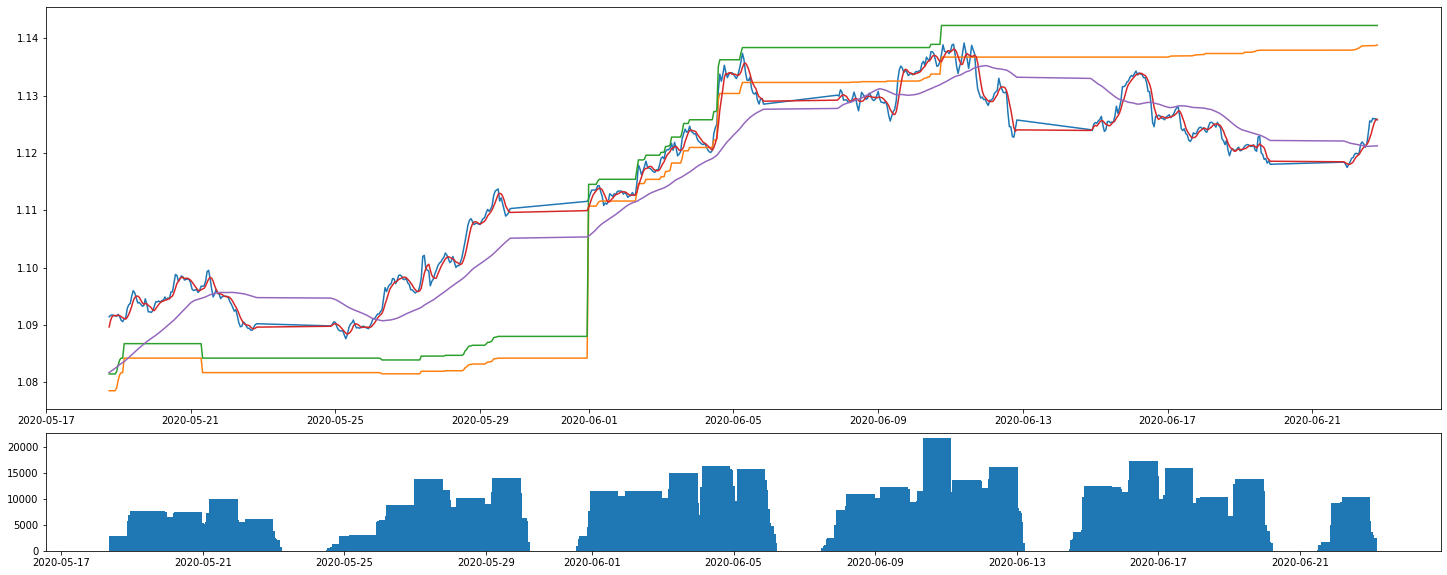

In [7]:
running(400, 600)

                                                     Time     Open     High  \
Date                                                                          
2020-06-22 15:00:00+00:00  2020-06-22T15:00:00.000000000Z  1.12486  1.12617   
2020-06-22 16:00:00+00:00  2020-06-22T16:00:00.000000000Z  1.12600  1.12640   
2020-06-22 17:00:00+00:00  2020-06-22T17:00:00.000000000Z  1.12610  1.12637   
2020-06-22 18:00:00+00:00  2020-06-22T18:00:00.000000000Z  1.12586  1.12634   
2020-06-22 19:00:00+00:00  2020-06-22T19:00:00.000000000Z  1.12609  1.12626   

                               Low     Close     Vol      Dev        M5  \
Date                                                                      
2020-06-22 15:00:00+00:00  1.12466  1.125415  5687.0  0.00151  1.123384   
2020-06-22 16:00:00+00:00  1.12572  1.126060  3695.0  0.00068  1.124395   
2020-06-22 17:00:00+00:00  1.12550  1.125935  2973.0  0.00087  1.125279   
2020-06-22 18:00:00+00:00  1.12565  1.125995  1368.0  0.00069  1.125805

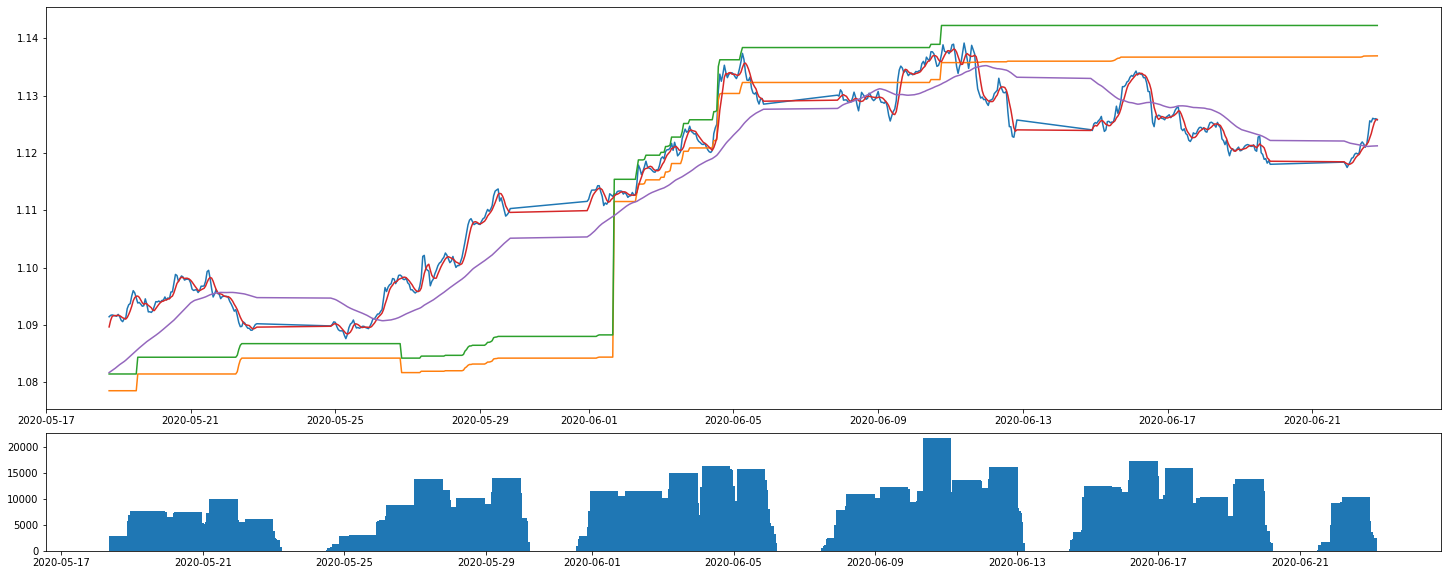

In [8]:
running(480, 600)